# Drawing Predictor

    Esse é o meu projeto final para a disciplina de Cáculo Numérico ministrada pelo Professor João Antonio Recio da Paixão no DCC-UFRJ em 2017.2 . O projeto era de livre escolha dos alunos, bastando apenas encaixar os métodos numéricos aprendidos em aula no problema a que fomos propostos em resolver. 
    O meu projeto consiste num preditor de desenhos, cujo objetivo é identificar o desenho realizado pelo usuário para que, então, possam ser corrigidas as imperfeições. Por exemplo, desenhar uma reta com um mouse não é um trabalho muito fácil, as chances de imperfeições são altas! No entanto, somos capazaes de entender que aquela reta, mesmo um pouco torta, é uma reta. Por que então o computador não prediz que o desenho era uma reta e então corrigi para um desenho de uma linha perfeita (algo que o computador faz muito bem).
    
   ## Motivo da escolha:
    
    Quando comecei a me interessar em Ciência de Dados e todos os seus ramos, encarei um problema ao tentar praticar o algoritmo de Regressão Linear: falta de dados bons e fáceis. Foi então que tive a ideia de gerar meus próprios dados! Nada melhor que um desenho, ou melhor, um conjunto de pares de pontos (x,y) com um forte apelo visual que facilitam a visualização dos dados e avaliação do modelo utilizado.
    
   ## Diretórios do projeto:
   
     Para facilitar o seu entendimento, particionei o projeto em 3 diretórios, dos quais:
     
   ### Dados
   
     Possui os dados que utilizarei aqui no notebook, além disso inclui uma ferramenta (coletor.py) que desenvolvi pra produzir os dados utilizados no estudo. Todos os dados foram produzidos no formato numpy, e consitem de um array contendo todos os pontos capturados no desenho pelo Coletor, ou seja, pares de (x, y) em um numpy array. Observe que este diretório está dentro do diretório Relatório, já que este será usado lá. 
     
   ### Relatório
   
     A princípio apenas conterá um notebook (este que está lendo), e algumas ferramentas semi-completas de tentativas com alguns métodos, para que você possa interagir com o projeto.
     
   ### Software
   
     Como o projeto final é predizer desenhos, a ferramenta final e os arquivos que lhe acompanham estarão neste diretório. Note que as conclusões e o desenvolvimento numérico do projeto serão realizados no notebook, enquanto que no software apenas encontrará a implementação sem grandes explicações.

   ## Como funcionará o relatório
   
     Infelizmente não encontrei nenhuma forma de trazer o Canvas para o notebook, dessa forma, nossa interação será feita por meio de arquivos em python que deixarei neste diretório. No entanto, alguns dados que produzirei com o Coletor serão utilizadas e plotados aqui mesmo, então não é necessário interagir totalmente com os arquivos em python, apenas caso queira explorar melhor.

   ## Predizendo retas: acostumando-se com as manipulações
   
      Para iniciar, começarei com um desafio muito fácil: descrever a reta que melhor define um conjunto de pontos. Obviamente este método falha quando o usuário pretende desenhar curvas (o programa irá dizer uma reta, mas de fato não será uma boa predição). O método que utilizarei será o de mínimos quadrados. Dados um conjunto de pontos (x, y), quero descobrir a melhor reta y=Mx+C . Ou seja, meu objetivo é descobrir o melhor par (M, C) dado um conjunto de retas. Veja a seguir o exemplo que utilizarei e, finalmente, a primeira linha de código do notebook!

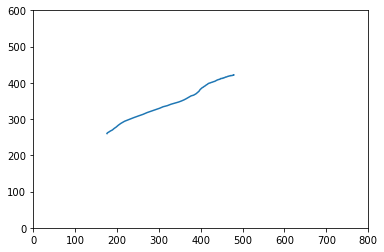

In [1]:
import numpy as np
import matplotlib.pyplot as plt

dados = np.load("Dados/reta.npy")
dados_x = dados[:, 0]
dados_y = dados[:, 1]
plt.plot(dados_x, dados_y)
plt.axis([0, 800, 0, 600])
plt.show()

    Para utilizarmos o método, temos que representar a equação da reta por meio do sistema Ax = y. Dessa forma, A será uma matriz de duas colunas e N linhas, onde N representa o número de pontos. Na primeira coluna teremos todos os valores de x para os pontos. Na segunda coluna temos sempre a constante 1, pois C sempre será multiplicada por 1. Já na matriz x, teremos os valores que queremos descobrir, ou seja, as constantes M e C. Em y teremos cada um dos valores de y para os pontos. Adotemos [t] ao lado de uma matriz como sendo sua transposta, e [-1] como sendo sua inversa.
    Do método dos mínimos quadrados temos:
        A.x = y
        A[t].A.x = A[t].y
        x = (A[t].A)[-1].A[t].y
        
    Disso descobrimos como obter a melhor aproximação para a matriz x.

In [27]:
from numpy.linalg import inv
temp = []
for i in range(0, dados_x.shape[0]):
    temp.append(1)

A = np.column_stack((dados_x,np.array(temp)))
y = dados_y.transpose()
A_t = A.transpose()

reduzida = np.dot(A_t, A)
inv_reduzida = inv(reduzida)

x = np.dot(np.dot(inv_reduzida, A_t), y)
print(x)
M = x[0]
C = x[1]

[   0.52803338  171.62196491]


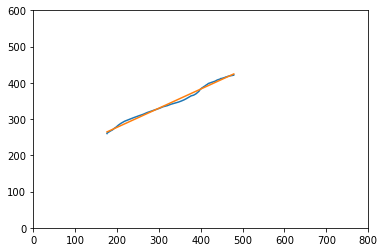

In [31]:
def reta(x):
    return M*x+C
x_min = x_max = dados_x[0]
for i in dados_x:
    x_min = min(x_min, i)
    x_max = max(x_max, i)

plt.plot(dados_x, dados_y)
plt.plot(range(x_min, x_max+1), reta(range(x_min, x_max+1)))
plt.axis([0, 800, 0, 600])
plt.show()